# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Implementation



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

In [2]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

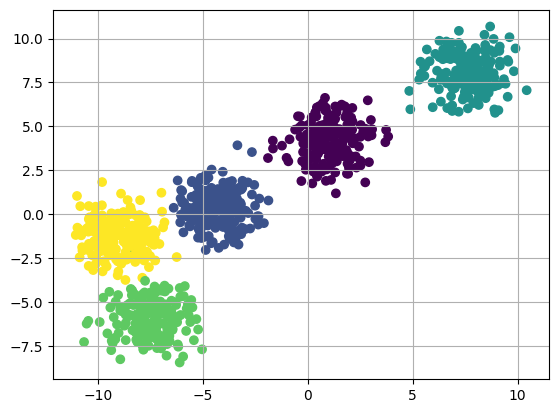

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
# Let's define k 
k = 5

color = ['green', 'red', 'blue', 'yellow', 'gray']
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center, 
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    


In [5]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [6]:
# Assign every data point to one of the clusters 
def assignPointToClusters(clusters): #E-step 

    for ix in range(X.shape[0]):
        
        dist = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])
            dist.append(d)
            
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(X[ix])
    

In [7]:
def updateClusters(clusters): #M-Step -> We update every cluster center according to the mean of the points
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # if cluster has some non-zero points
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clear my points list 
            clusters[kx]['points'] = []      
        

In [8]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        # plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker='*')

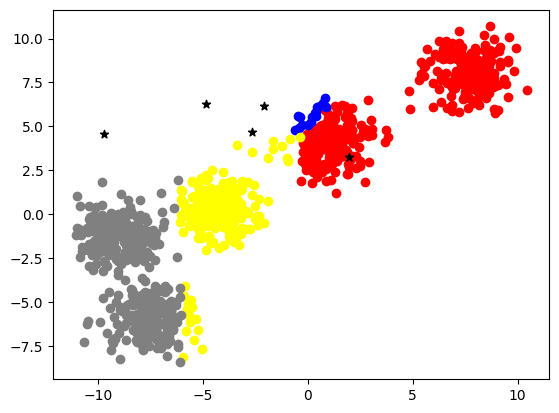

In [9]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [10]:
# Repeat the process of step 2 and step 3 until convergence 

count =1 
while True:
    assignPointToClusters(clusters)
    updateClusters(clusters)
    count+=1
    if count>1000:
        break

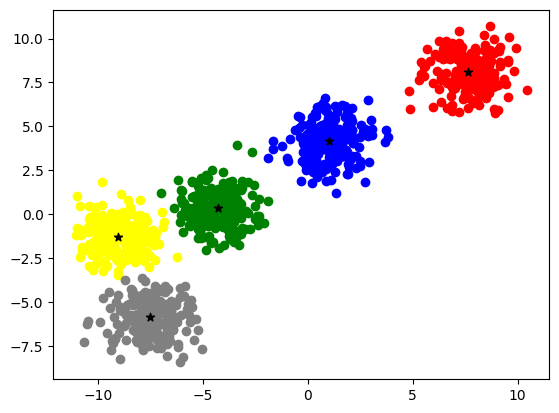

In [11]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)